In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
df_oh_encoded = pd.read_csv(r"data\df_oh_encoded.csv")
df_oh_encoded.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,previous_contact
0,31,35.0,999,0.0,1.4,93.918,-42.7,4.968,5228.1,0,...,False,False,False,False,True,False,False,True,False,0
1,39,29.0,999,0.0,1.4,93.918,-42.7,4.968,5228.1,0,...,False,False,False,False,True,False,False,True,False,0
2,25,29.0,999,0.0,1.4,93.918,-42.7,4.968,5228.1,0,...,False,False,False,False,True,False,False,True,False,0
3,29,27.0,999,0.0,1.4,94.465,-41.8,4.959,5228.1,0,...,False,False,False,False,False,False,False,True,False,0
4,41,24.0,999,0.0,1.4,94.465,-41.8,4.959,5228.1,0,...,False,False,False,False,False,False,False,True,False,0


In [ ]:
X = df_oh_encoded.drop("y", axis=1)
y = df_oh_encoded["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

columns_to_skip_scaling = X_train.iloc[:,10:].columns

X_train_oh = X_train[columns_to_skip_scaling].to_numpy()
X_test_oh = X_test[columns_to_skip_scaling].to_numpy()

X_train_to_scale = X_train.drop(columns_to_skip_scaling, axis=1)
X_test_to_scale = X_test.drop(columns_to_skip_scaling, axis=1)

X_train_scaled = scaler.fit_transform(X_train_to_scale)
X_test_scaled = scaler.transform(X_test_to_scale)

X_train_scaled=np.hstack((X_train_scaled,X_train_oh))
X_test_scaled=np.hstack((X_test_scaled,X_test_oh))

In [ ]:
# Support Vector Machine
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
svm_preds = svm_classifier.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_preds)
print("SVM Accuracy:", svm_accuracy)
svm_report = classification_report(y_test, svm_preds)
print("SVM Classification Report:")
print(svm_report)

scores = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

SVM Accuracy: 0.8689320388349514
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       716
           1       0.50      0.13      0.21       108

    accuracy                           0.87       824
   macro avg       0.69      0.56      0.57       824
weighted avg       0.83      0.87      0.83       824

0.91 accuracy with a standard deviation of 0.01


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train_scaled, y_train)
logreg_preds = logreg_classifier.predict(X_test_scaled)

logreg_accuracy = accuracy_score(y_test, logreg_preds)
print("Logistic Regression Accuracy:", logreg_accuracy)
logreg_report = classification_report(y_test, logreg_preds)
print("Logistic Regression Classification Report:")
print(logreg_report)

scores = cross_val_score(logreg_classifier, X_train_scaled, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Logistic Regression Accuracy: 0.866504854368932
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       716
           1       0.47      0.15      0.23       108

    accuracy                           0.87       824
   macro avg       0.68      0.56      0.58       824
weighted avg       0.83      0.87      0.84       824

0.91 accuracy with a standard deviation of 0.01


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
dt_preds = dt_classifier.predict(X_test_scaled)

dt_accuracy = accuracy_score(y_test, dt_preds)
print("Decision Tree Accuracy:", dt_accuracy)
dt_report = classification_report(y_test, dt_preds)
print("Decision Tree Classification Report:")
print(dt_report)

scores = cross_val_score(dt_classifier, X_train_scaled, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


Decision Tree Accuracy: 0.8276699029126213
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       716
           1       0.30      0.23      0.26       108

    accuracy                           0.83       824
   macro avg       0.59      0.57      0.58       824
weighted avg       0.81      0.83      0.82       824

0.85 accuracy with a standard deviation of 0.01


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier 

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
rf_preds = rf_classifier.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_accuracy)
rf_report = classification_report(y_test, rf_preds)
print("Random Forest Classification Report:")
print(rf_report)

scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


Random Forest Accuracy: 0.8652912621359223
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       716
           1       0.45      0.13      0.20       108

    accuracy                           0.87       824
   macro avg       0.67      0.55      0.56       824
weighted avg       0.83      0.87      0.83       824

0.90 accuracy with a standard deviation of 0.01


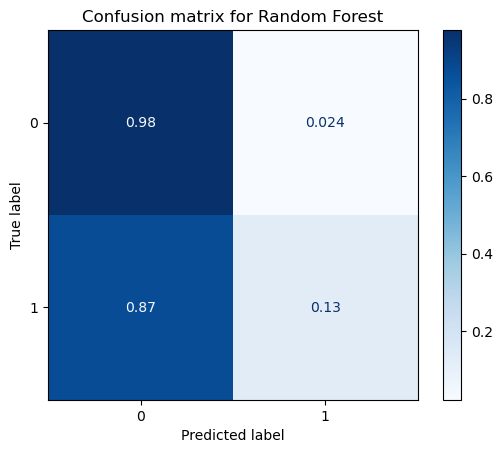

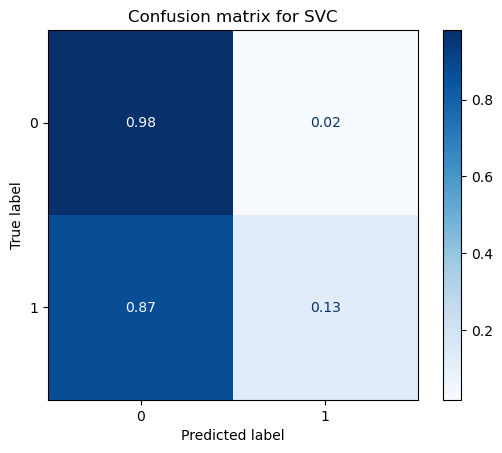

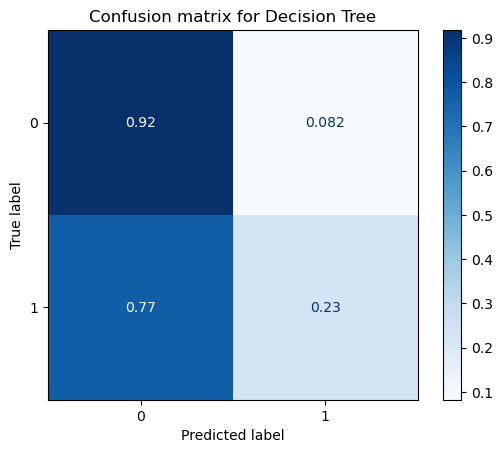

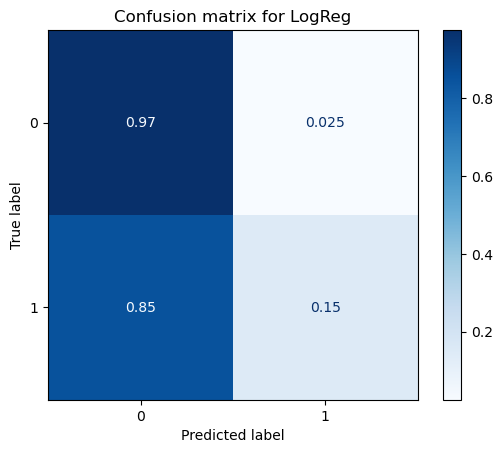

In [ ]:
# matrice konfuzije
from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(rf_classifier, X_test_scaled, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for Random Forest')
plt.show(matrix)

matrix = plot_confusion_matrix(svm_classifier, X_test_scaled, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for SVC')
plt.show(matrix)

matrix = plot_confusion_matrix(dt_classifier, X_test_scaled, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for Decision Tree')
plt.show(matrix)

matrix = plot_confusion_matrix(logreg_classifier, X_test_scaled, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for LogReg')
plt.show(matrix)
plt.show()

In [ ]:
# Balansiranje dataseta koriscenjem undersampling metode
y_train_series = pd.Series(y_train.ravel())

class_0_indices = y_train_series[y_train_series == 0].index
class_1_indices = y_train_series[y_train_series == 1].index

np.random.seed(42)
undersample_indices = np.random.choice(class_0_indices, len(class_1_indices), replace=False)
balanced_indices = np.concatenate([undersample_indices, class_1_indices])

X_train_balanced = X_train_scaled[balanced_indices]
y_train_balanced = y_train_series.iloc[balanced_indices].values

X_train_balanced.shape, y_train_balanced.shape

((686, 53), (686,))

In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_balanced, y_train_balanced)
svm_preds = svm_classifier.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_preds)
print("SVM Accuracy:", svm_accuracy)
svm_report = classification_report(y_test, svm_preds)
print("SVM Classification Report:")
print(svm_report)

SVM Accuracy: 0.8191747572815534
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       716
           1       0.36      0.50      0.42       108

    accuracy                           0.82       824
   macro avg       0.64      0.68      0.66       824
weighted avg       0.85      0.82      0.83       824



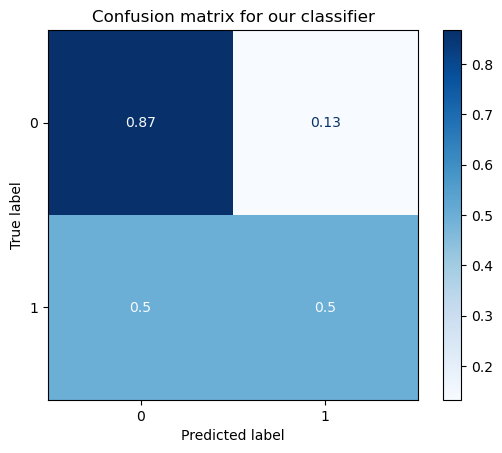

In [ ]:
matrix = plot_confusion_matrix(svm_classifier, X_test_scaled, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

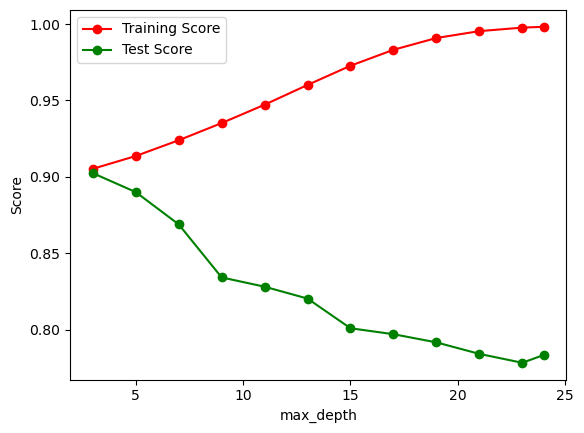

In [ ]:
# provera pretreniranosti modela

param_name = 'max_depth'
param_range = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 24]

train_scores, test_scores = validation_curve(dt_classifier, X, y, param_name=param_name, param_range=param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(param_range, test_scores_mean, 'o-', color='g', label='Test Score')
plt.legend(loc='best')
plt.xlabel(param_name)
plt.ylabel('Score')
plt.show()

###  Prilagodjavanje parametara

In [ ]:
# za pretragu optimalnih parametara koristili smo resetkasto pretrazivanje
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [10, 1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced.ravel())

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

best_params, best_estimator

Fitting 5 folds for each of 25 candidates, totalling 125 fits


({'C': 1000, 'gamma': 0.001}, SVC(C=1000, gamma=0.001, random_state=42))

In [ ]:
svm_classifier = SVC(C=1000, gamma=0.001, random_state=42)
svm_classifier.fit(X_train_balanced, y_train_balanced)
svm_preds = svm_classifier.predict(X_test_scaled)


svm_accuracy = accuracy_score(y_test, svm_preds)
print("SVM Accuracy:", svm_accuracy)
svm_report = classification_report(y_test, svm_preds)
print("SVM Classification Report:")
print(svm_report)

SVM Accuracy: 0.6890756302521008
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       195
           1       0.29      0.51      0.37        43

    accuracy                           0.69       238
   macro avg       0.58      0.62      0.58       238
weighted avg       0.77      0.69      0.72       238



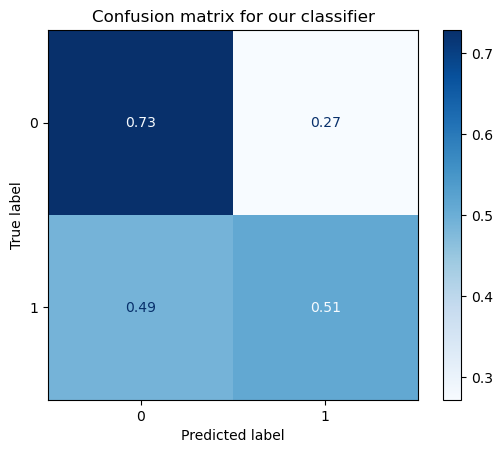

In [ ]:
matrix = plot_confusion_matrix(svm_classifier, X_test_scaled, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

### Prilagodjavanje granice odlucivanja

In [ ]:
threshold = 0.2
y_pred = (rf_classifier.predict_proba(X_test_scaled)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred)

array([[645,  71],
       [ 61,  47]])

In [ ]:
threshold = 0.37
y_pred = (rf_classifier.predict_proba(X_test_scaled)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred)

array([[687,  29],
       [ 81,  27]])

In [ ]:
threshold = 0.12
y_pred = (rf_classifier.predict_proba(X_test_scaled)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred)

array([[590, 126],
       [ 54,  54]])

In [ ]:
threshold = 0.5
y_pred = (rf_classifier.predict_proba(X_test_scaled)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred)

array([[699,  17],
       [ 94,  14]])

In [ ]:
threshold = 0.75
y_pred = (rf_classifier.predict_proba(X_test_scaled)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred)

array([[709,   7],
       [ 98,  10]])

In [ ]:
threshold = 0.4
y_pred = (rf_classifier.predict_proba(X_test_scaled)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred)

array([[690,  26],
       [ 82,  26]])

max recall: 0.6 
for threshold: 60


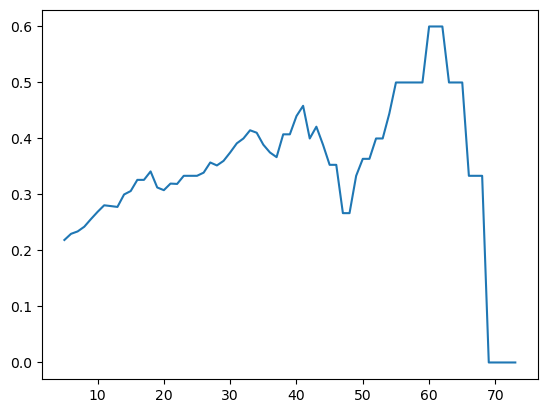

In [ ]:
recall_y = []

for threshold in range(5,98):
    y_pred = (rf_classifier.predict_proba(X_test_scaled)[:, 1] > threshold/100).astype('float')
    cm = confusion_matrix(y_test, y_pred)
    recall = cm[1][1]/(cm[1][1]+cm[0][1])
    if (cm[1][1]+cm[0][1]) != 0:
        recall_y.append(cm[1][1]/(cm[1][1]+cm[0][1]))

plt.plot(list(range(5, 5+len(recall_y))), recall_y)
print("max recall:",max(recall_y),"\nfor threshold:", 5+recall_y.index(max(recall_y)))